## What is a cohort?
#### Is a group of people with a shared characteristic. In this case, the cohort are made by the group of people who made the first transaction in the same month.
##### The graphic obtained shows in the diagonal part the index of new customers' obtained, while the linear rows show the retention index compared with the original amount.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Import the relevant data
df_fees = pd.read_csv("../project_dataset/extract - fees - data analyst - .csv")
# Display the first 5 rows
df_fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [4]:
# Convert the "created_at" column to a datetime format
df_fees["created_at"] = pd.to_datetime(df_fees["created_at"])

# Group the data by the "id" column within the "created_at" column using a groupby.
# We look for the minimum value of each group and convert the dates to a monthly period object.
# This helps to determine when each user made their first transfer request.
first_transaction_month = df_fees.groupby("id")["created_at"].transform("min").dt.to_period("M")

# Create a new column reflecting the monthly cohorts.
df_fees["cohort_month"] = first_transaction_month

# Print the first 5 rows to see the monthly cohorts.
df_fees


/var/folders/l8/nzfg4l2524n0y13740c8fkm40000gn/T/ipykernel_12708/2615516299.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  first_transaction_month = df_fees.groupby("id")["created_at"].transform("min").dt.to_period("M")


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment,cohort_month
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after,2020-09
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after,2020-09
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after,2020-10
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after,2020-10
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after,2020-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21056,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00:00,2020-10-13 14:25:04.18049+00,2020-11-17 05:14:00.080854+00,NaN,NaN,after,2020-10
21057,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00:00,2020-10-31 15:24:18.680715+00,2020-12-16 07:10:54.697639+00,NaN,NaN,after,2020-10
21058,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00:00,2020-10-27 17:28:51.7492+00,2020-11-18 04:35:42.915511+00,NaN,NaN,after,2020-10
21059,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00:00,2020-10-23 16:27:52.047486+00,2020-12-18 05:18:01.465317+00,NaN,NaN,after,2020-10


In [5]:
# A new variable is created to count the grouping of data by the "cohort_month" column within the "id" column using a groupby.
# This helps to determine which users made the transfer request in that month.
cohort_month_counts = df_fees.groupby("cohort_month")["id"].count()

# Display how many users (ID) made a transaction during that month.
cohort_month_counts


cohort_month
2020-05       16
2020-06      769
2020-07     1619
2020-08     3052
2020-09     4572
2020-10    10766
2020-11      267
Freq: M, Name: id, dtype: int64

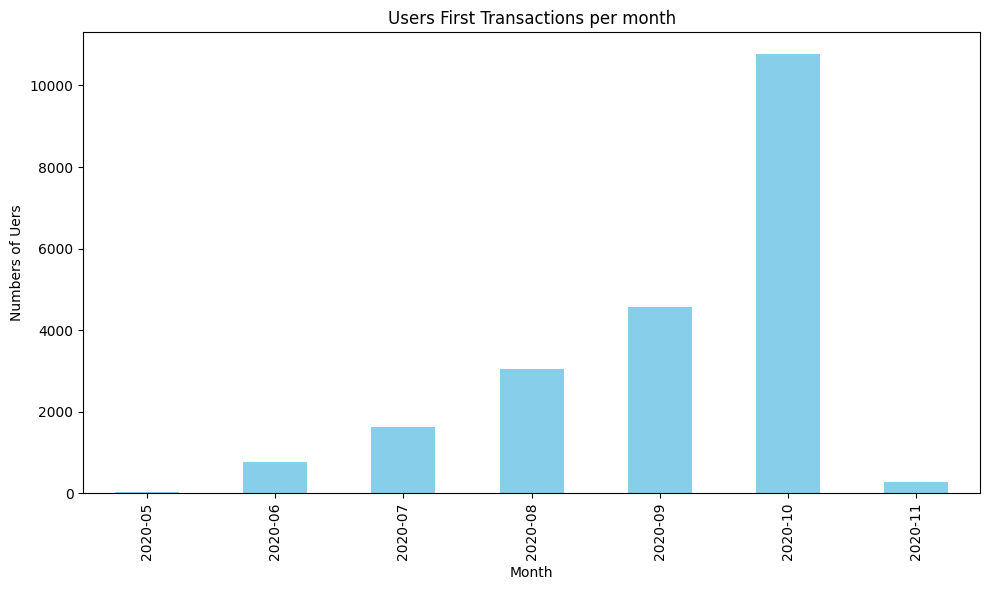

In [6]:
# We create a bar chart
plt.figure(figsize=(10, 6))
cohort_month_counts.plot(kind='bar', color='skyblue')
# We add tittles and variables
plt.xlabel('Month')
plt.ylabel('Numbers of Uers')
plt.title('Users First Transactions per month')
# We show the graph
plt.tight_layout()
plt.show()